<a href="https://www.kaggle.com/code/manavmaheshsanger/student-depressin?scriptVersionId=233261081" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# About Dataset
This dataset compiles a wide range of information aimed at understanding, analyzing, and predicting depression levels among students. 

## Data Description
### Features: 
- id: A unique identifier assigned to each student record in the dataset.

- Gender: The gender of the student (e.g., Male, Female, Other). This helps in analyzing gender-specific trends in mental health.

- Age: The age of the student in years.

- City: The city or region where the student resides, providing geographical context for the analysis.

- Profession: The field of work or study of the student, which may offer insights into occupational or academic stress factors.

- Academic Pressure: A measure indicating the level of pressure the student faces in academic settings. This could include stress from exams, assignments, and overall academic expectations.

- Work Pressure: A measure of the pressure related to work or job responsibilities, relevant for students who are employed alongside their studies.

- CGPA: The cumulative grade point average of the student, reflecting overall academic performance.

- Study Satisfaction: An indicator of how satisfied the student is with their studies, which can correlate with mental well-being.

- Job Satisfaction: A measure of the student’s satisfaction with their job or work environment, if applicable.

- Sleep Duration: The average number of hours the student sleeps per day, which is an important factor in mental health.

- Dietary Habits: An assessment of the student’s eating patterns and nutritional habits, potentially impacting overall health and mood.

- Degree: The academic degree or program that the student is pursuing.

- Have you ever had suicidal thoughts ?: A binary indicator (Yes/No) that reflects whether the student has ever experienced suicidal ideation.

- Work/Study Hours: The average number of hours per day the student dedicates to work or study, which can influence stress levels.

- Financial Stress: A measure of the stress experienced due to financial concerns, which may affect mental health.

- Family History of Mental Illness: Indicates whether there is a family history of mental illness (Yes/No), which can be a significant factor in mental health predispositions.

### Target Variable:
- Depression: The target variable that indicates whether the student is experiencing depression (Yes/No). This is the primary focus of the analysis.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-depression-dataset/student_depression_dataset.csv


# EDA 
- there are no null values in cols
- there are no doplicate rows
- 2 genders (male, female), 52 Indian Cities, 6 academic Pressures(0.0 - 5.0), 6 study satisfaction (0.0 - 5.0)
- 14 professions but huge majority is students (99%)
- 6 work Pressure (0.0 - 5.0) but data is highly skewed(99% - 0.0) to 0 as 99% are students
- Sleep Duration : complex range wise feature
- Dietary Habits: 4 habits Unhealthy, Moderate, Healthy, Others

## TODOs
1. delete profession col, work pressure col, 
2. remove rows where profession is not students
3. remove rows where financial stress = ? (3 categorical rows)

## Loading the Dataset and analyzing cols

In [2]:
df = pd.read_csv("/kaggle/input/student-depression-dataset/student_depression_dataset.csv")
df.sample(5)

# TODO:
# Ordinal Cols : Gender, Profession, Dietary Habits, Degree
# Nominal Cols : City, suicidal thougts, family history

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
22565,113780,Male,26.0,Kolkata,Student,4.0,0.0,9.34,2.0,0.0,'7-8 hours',Unhealthy,B.Ed,Yes,5.0,5.0,No,1
403,2012,Male,33.0,Faridabad,Student,4.0,0.0,5.37,4.0,0.0,'5-6 hours',Moderate,B.Ed,No,5.0,1.0,No,0
159,777,Male,30.0,Surat,Student,1.0,0.0,5.65,5.0,0.0,'7-8 hours',Unhealthy,M.Ed,Yes,12.0,4.0,Yes,0
1464,7556,Male,26.0,Jaipur,Student,5.0,0.0,9.56,5.0,0.0,'Less than 5 hours',Unhealthy,B.Ed,Yes,11.0,2.0,Yes,1
12064,60902,Male,26.0,Surat,Student,4.0,0.0,9.13,1.0,0.0,'More than 8 hours',Moderate,M.Tech,Yes,5.0,5.0,No,1


In [3]:
print(df.shape)

(27901, 18)


In [4]:
# null values
df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [5]:
df.nunique()

id                                       27901
Gender                                       2
Age                                         34
City                                        52
Profession                                  14
Academic Pressure                            6
Work Pressure                                3
CGPA                                       332
Study Satisfaction                           6
Job Satisfaction                             5
Sleep Duration                               5
Dietary Habits                               4
Degree                                      28
Have you ever had suicidal thoughts ?        2
Work/Study Hours                            13
Financial Stress                             6
Family History of Mental Illness             2
Depression                                   2
dtype: int64

In [6]:
df["Profession"].value_counts() 
# 14 professions but data is highly skewed towards students

Profession
Student                     27870
Architect                       8
Teacher                         6
'Digital Marketer'              3
'Content Writer'                2
Chef                            2
Doctor                          2
Pharmacist                      2
'Civil Engineer'                1
'UX/UI Designer'                1
'Educational Consultant'        1
Manager                         1
Lawyer                          1
Entrepreneur                    1
Name: count, dtype: int64

In [7]:
df["Academic Pressure"].value_counts()

Academic Pressure
3.0    7462
5.0    6296
4.0    5155
1.0    4801
2.0    4178
0.0       9
Name: count, dtype: int64

In [8]:
df["Work Pressure"].value_counts()

Work Pressure
0.0    27898
5.0        2
2.0        1
Name: count, dtype: int64

In [9]:
df["Study Satisfaction"].value_counts()

Study Satisfaction
4.0    6359
2.0    5838
3.0    5821
1.0    5451
5.0    4422
0.0      10
Name: count, dtype: int64

In [10]:
df["Sleep Duration"].value_counts()

Sleep Duration
'Less than 5 hours'    8310
'7-8 hours'            7346
'5-6 hours'            6183
'More than 8 hours'    6044
Others                   18
Name: count, dtype: int64

In [11]:
df["Dietary Habits"].value_counts()

Dietary Habits
Unhealthy    10317
Moderate      9921
Healthy       7651
Others          12
Name: count, dtype: int64

In [12]:
df["Degree"].value_counts()

Degree
'Class 12'    6080
B.Ed          1867
B.Com         1506
B.Arch        1478
BCA           1433
MSc           1190
B.Tech        1152
MCA           1044
M.Tech        1022
BHM            925
BSc            888
M.Ed           821
B.Pharm        810
M.Com          734
MBBS           696
BBA            696
LLB            671
BE             613
BA             600
M.Pharm        582
MD             572
MBA            562
MA             544
PhD            522
LLM            482
MHM            191
ME             185
Others          35
Name: count, dtype: int64

In [13]:
df["Financial Stress"].value_counts()

Financial Stress
5.0    6715
4.0    5775
3.0    5226
1.0    5121
2.0    5061
?         3
Name: count, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [15]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


## doing TODOs

In [21]:
# removing rows
df = pd.read_csv("/kaggle/input/student-depression-dataset/student_depression_dataset.csv")
df.drop(df[df["Profession"] != "Student"].index, inplace=True)
df.drop(df[df["Financial Stress"] == "?"].index, inplace=True)
df.drop(["id"], axis="columns", inplace=True)

# dropping cols
df = df.drop(["Profession", "Work Pressure", "Job Satisfaction"], axis="columns")
df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,5.0,8.97,2.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,2.0,5.90,5.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,3.0,7.03,5.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,3.0,5.59,2.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,4.0,8.13,3.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [22]:
df.shape

(27867, 14)

## Plotting graphs

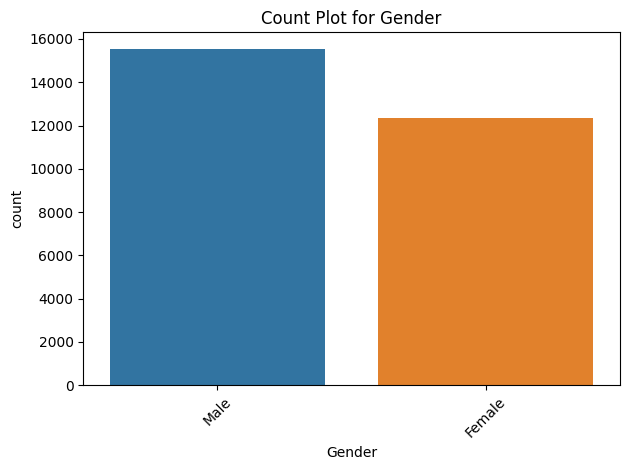

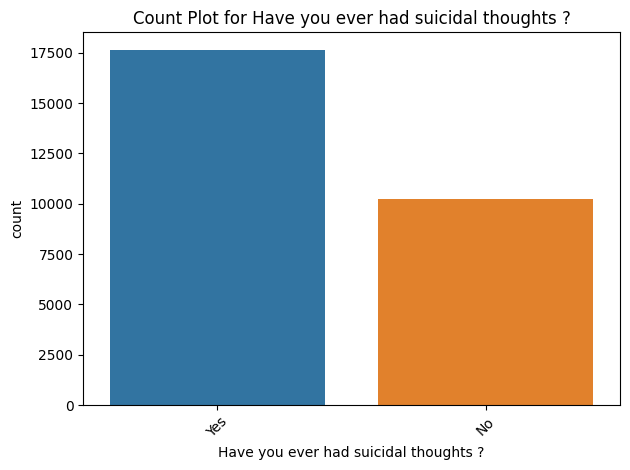

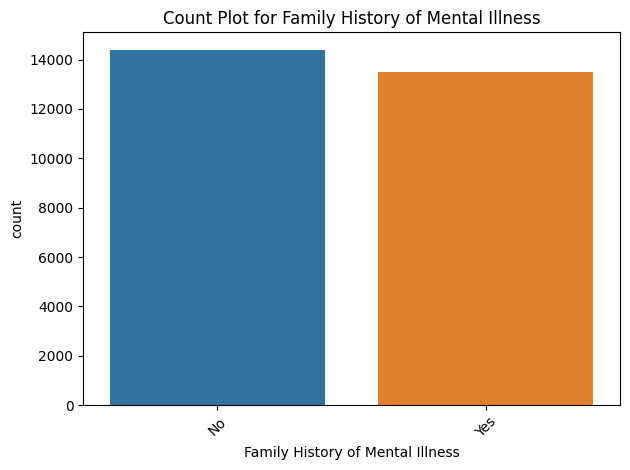

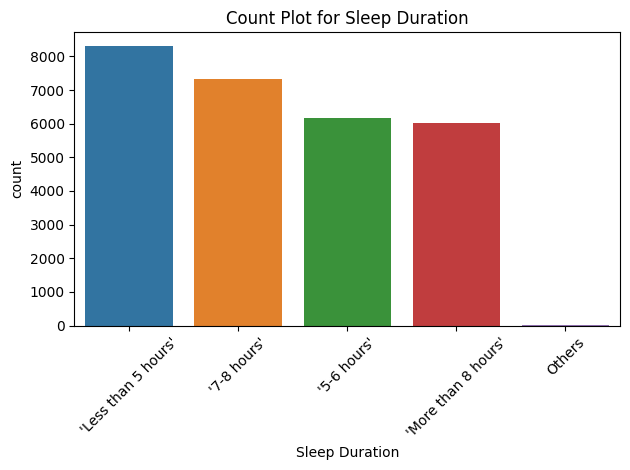

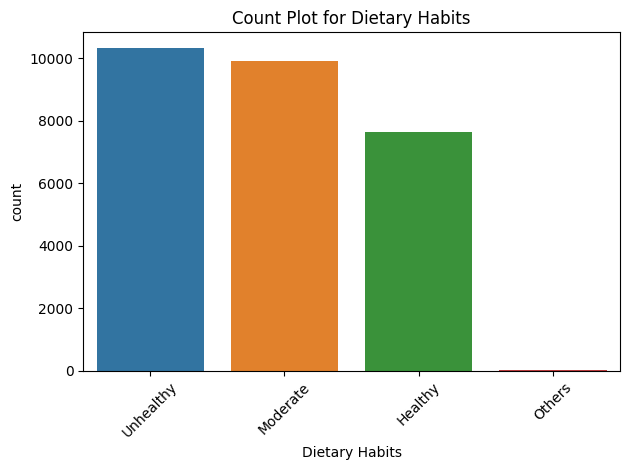

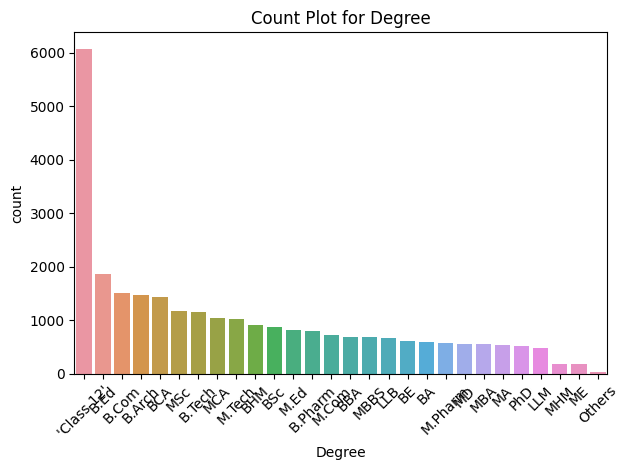

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# defininng cols
ordinal_cols = ["Sleep Duration", "Dietary Habits", "Degree"]
nominal_cols = ["Gender", "City", "Have you ever had suicidal thoughts ?", "Family History of Mental Illness"]
numerical_cols = ["Age", "Academic Pressure", "CGPA", "Study Satisfaction", "Work/Study Hours", "Financial Stress"]

for col in nominal_cols + ordinal_cols:
    if col == "City":
        continue
    plt.figure()
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Count Plot for {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Distribution of Numerical Features and Outlier Detection

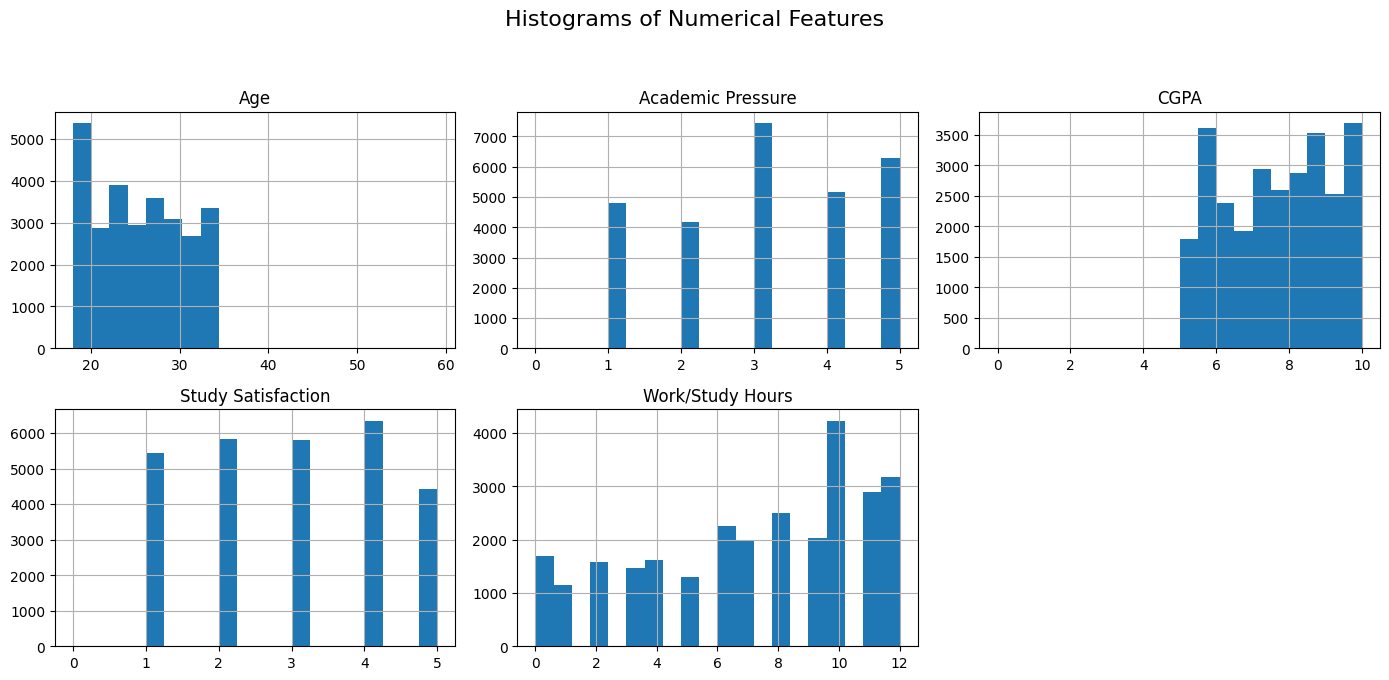

In [25]:
# Plot histograms for numerical features
df[numerical_cols].hist(bins=20, figsize=(14, 10), layout=(3,3));
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Correlation Analysis

Correlation Matrix:


,Age,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress
Age,1.000000,-0.075922,0.005185,0.009135,-0.032848,-0.095251
Academic Pressure,-0.075922,1.000000,-0.022338,-0.111001,0.096374,0.151795
CGPA,0.005185,-0.022338,1.000000,-0.044333,0.002646,0.005814
Study Satisfaction,0.009135,-0.111001,-0.044333,1.000000,-0.036425,-0.065174
Work/Study Hours,-0.032848,0.096374,0.002646,-0.036425,1.000000,0.075450
Financial Stress,-0.095251,0.151795,0.005814,-0.065174,0.075450,1.000000


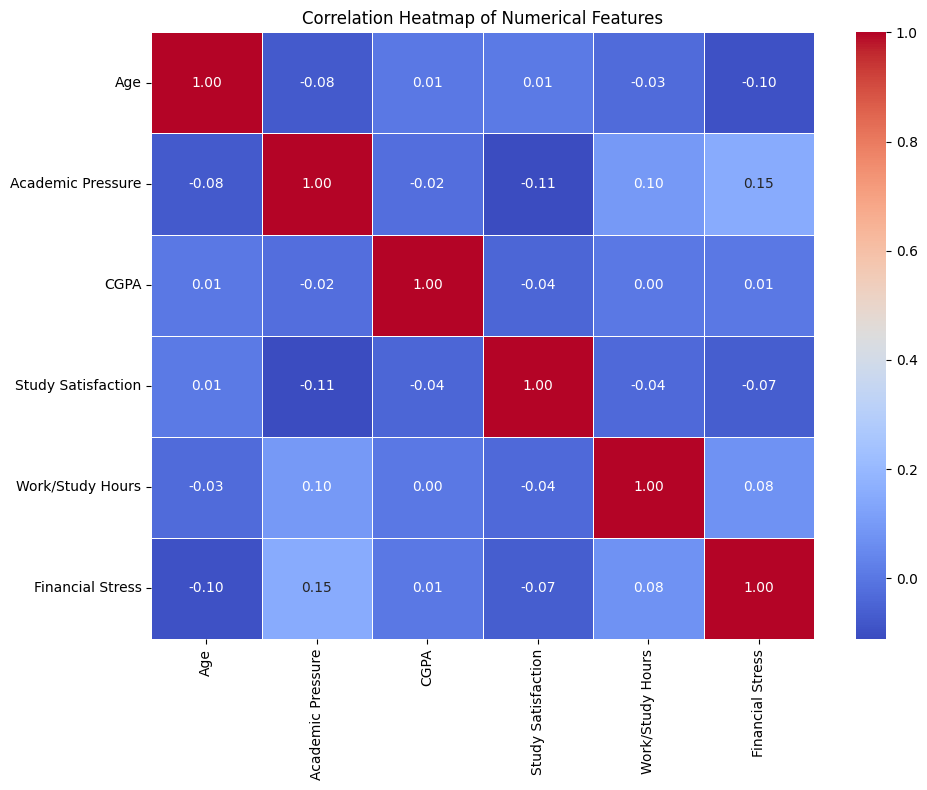

In [26]:
corr_matrix = df[numerical_cols].corr()
print("Correlation Matrix:")
display(corr_matrix)

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

### Target Variable Analysis

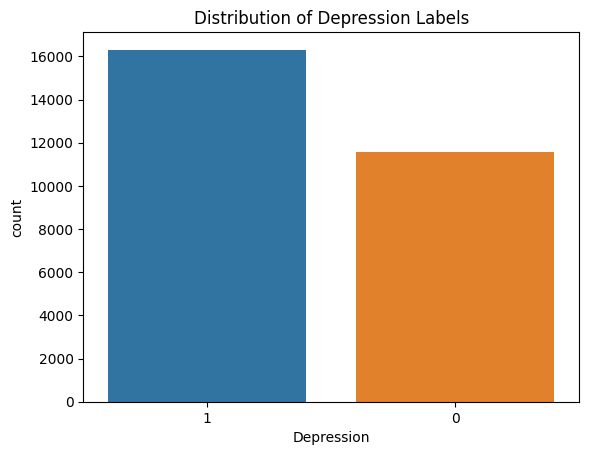

In [27]:
plt.figure()
sns.countplot(data=df, x="Depression", order=df["Depression"].value_counts().index)
plt.title("Distribution of Depression Labels")
plt.show()

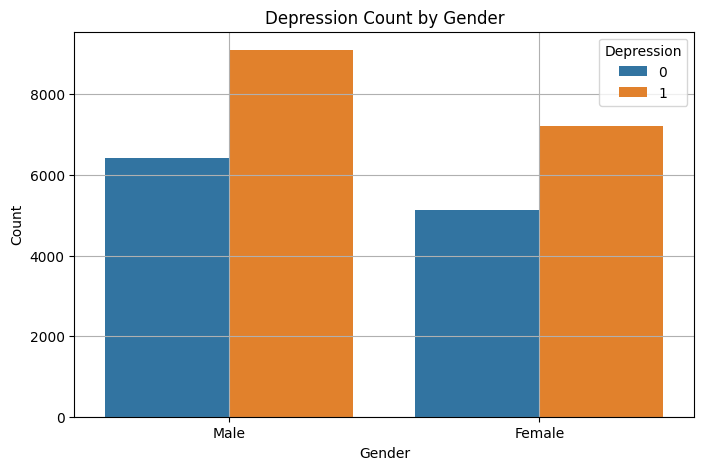

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x="Gender", hue="Depression", data=df)
plt.title("Depression Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

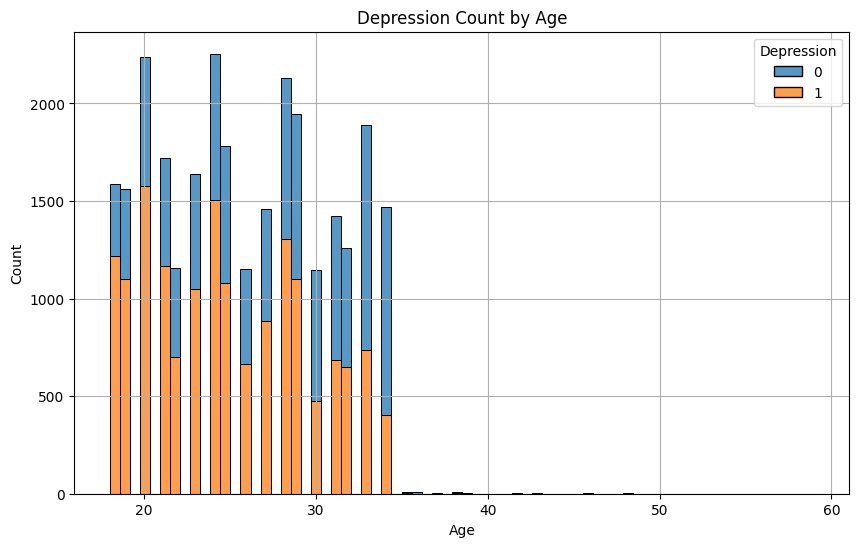

In [112]:
plt.figure(figsize=(10, 6))
sns.histplot(x="Age", hue="Depression", data=df, multiple="stack")
plt.title("Depression Count by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

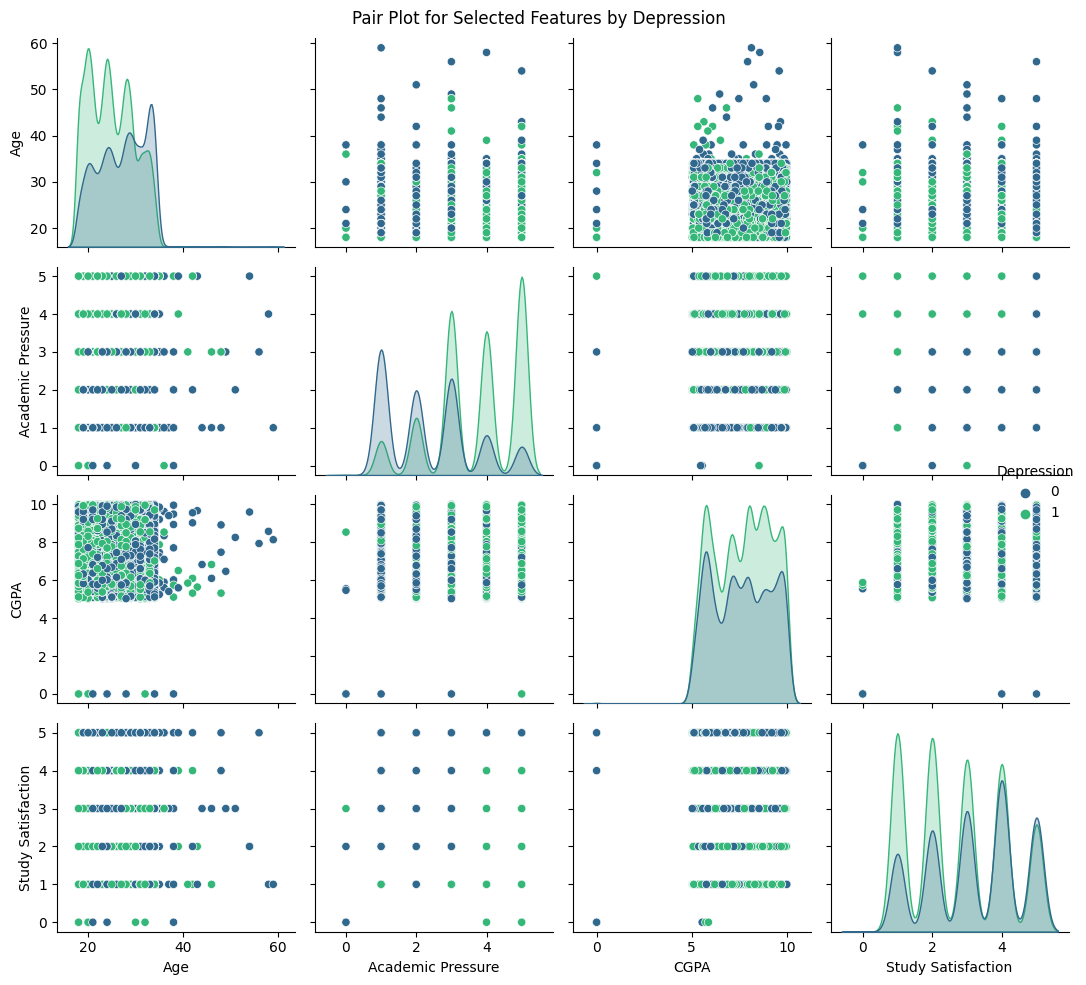

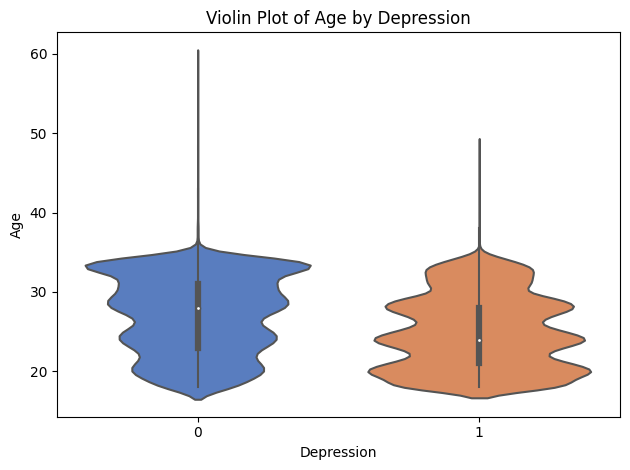

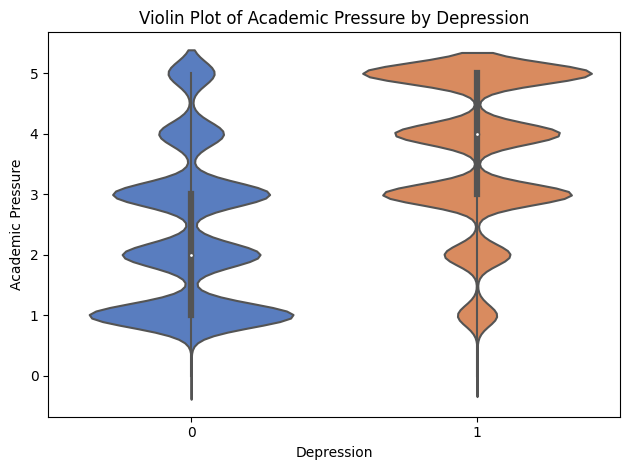

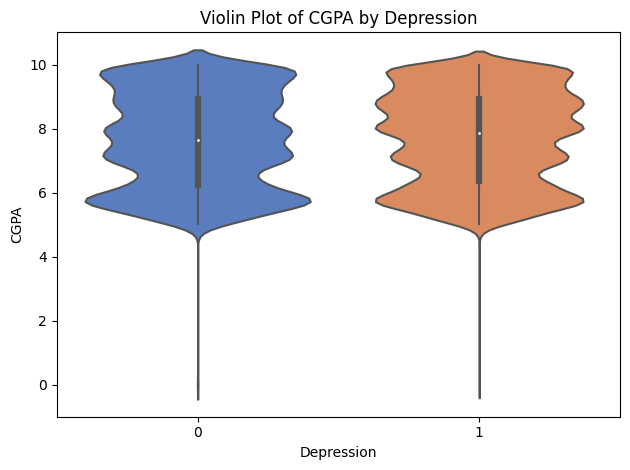

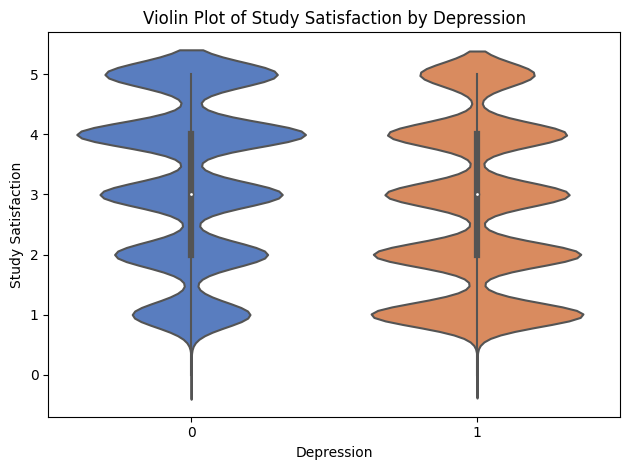

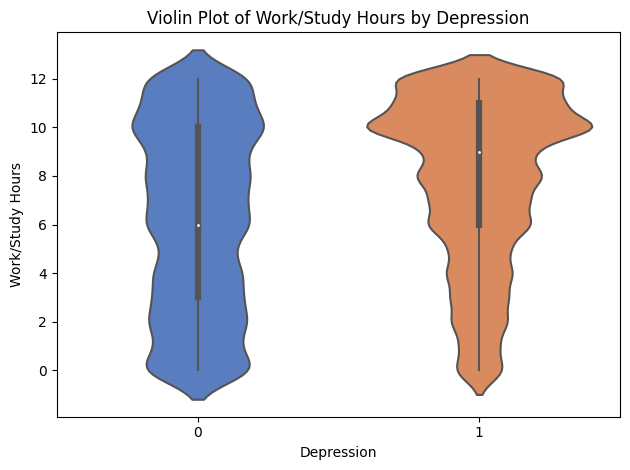

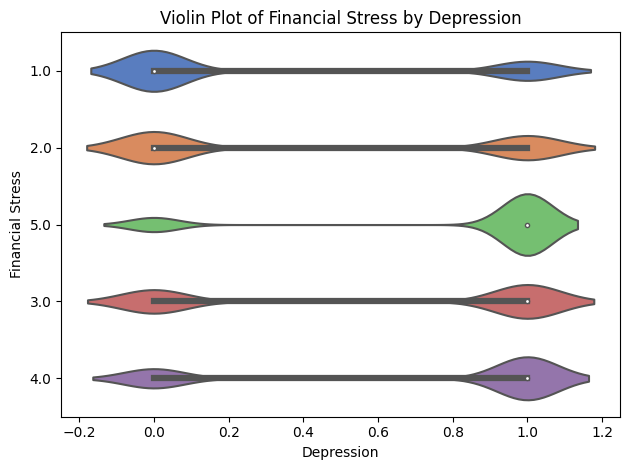

In [29]:
subset_features = ["Age", "Academic Pressure", "CGPA", "Study Satisfaction", "Financial Stress", "Depression"]

sns.pairplot(df[subset_features], hue="Depression", diag_kind="kde", palette="viridis")
plt.suptitle("Pair Plot for Selected Features by Depression")
plt.tight_layout()
plt.show()

# Optionally, violin plots can be used to compare the distribution of numerical features across target classes:
for col in numerical_cols:
    plt.figure()
    sns.violinplot(data=df, x="Depression", y=col, palette="muted")
    plt.title(f"Violin Plot of {col} by Depression")
    plt.tight_layout()
    plt.show()

# Model Building

## Train test split

In [32]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df.iloc[:, 0:-1], df.iloc[:, -1], test_size=0.2, random_state=42)

## Encoding categorical variables

In [33]:
xTrain.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
5030,Male,34.0,Meerut,1.0,7.88,4.0,'5-6 hours',Moderate,BCA,Yes,10.0,3.0,No
12421,Female,32.0,Lucknow,5.0,8.92,1.0,'Less than 5 hours',Moderate,M.Ed,No,7.0,2.0,Yes
14676,Female,25.0,Visakhapatnam,5.0,7.07,2.0,'7-8 hours',Unhealthy,B.Com,Yes,10.0,5.0,No
13074,Male,29.0,Surat,1.0,9.44,5.0,'7-8 hours',Moderate,B.Pharm,No,2.0,2.0,No
18229,Female,26.0,Kolkata,2.0,9.50,1.0,'Less than 5 hours',Moderate,MCA,No,9.0,5.0,No


In [35]:
# ordinal Encoding: Sleep Duration, Dietary Habits, Degree
# Nominal Encoding: Gender, City, Suicidal Thoughts, Family history

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler

# defininng cols
ordinal_cols = ["Sleep Duration", "Dietary Habits", "Degree"]
nominal_cols = ["Gender", "City", "Have you ever had suicidal thoughts ?", "Family History of Mental Illness"]
numerical_cols = ["Age", "Academic Pressure", "CGPA", "Study Satisfaction", "Work/Study Hours", "Financial Stress"]

preprocessor = ColumnTransformer(
    transformers = [
        ("ord", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ordinal_cols),
        ("ohe", OneHotEncoder( drop="first", sparse=False, handle_unknown='ignore'), nominal_cols),
        ("num", StandardScaler(), numerical_cols) # keeping numerical cols unchanged
    ]
)

xTrain = preprocessor.fit_transform(xTrain)
xTest = preprocessor.transform(xTest)
xTrain = pd.DataFrame(xTrain, columns=preprocessor.get_feature_names_out())
xTrain.head()

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,ord__Sleep Duration,ord__Dietary Habits,ord__Degree,ohe__Gender_Male,ohe__City_'Less than 5 Kalyan',ohe__City_3.0,ohe__City_Agra,ohe__City_Ahmedabad,ohe__City_Bangalore,ohe__City_Bhavna,...,ohe__City_Vasai-Virar,ohe__City_Visakhapatnam,ohe__Have you ever had suicidal thoughts ?_Yes,ohe__Family History of Mental Illness_Yes,num__Age,num__Academic Pressure,num__CGPA,num__Study Satisfaction,num__Work/Study Hours,num__Financial Stress
0,0.0,1.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.664111,-1.543768,0.151459,0.769146,0.768507,-0.096251
1,2.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.256449,1.350091,0.857478,-1.433651,-0.038670,-0.792233
2,1.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,-0.170366,1.350091,-0.398420,-0.699386,0.768507,1.295715
3,1.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.644957,-1.543768,1.210487,1.503412,-1.383964,-0.792233
4,2.0,1.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.033464,-0.820303,1.251219,-1.433651,0.499448,1.295715


In [36]:
xTrain.columns

Index(['ord__Sleep Duration', 'ord__Dietary Habits', 'ord__Degree',
       'ohe__Gender_Male', 'ohe__City_'Less than 5 Kalyan'', 'ohe__City_3.0',
       'ohe__City_Agra', 'ohe__City_Ahmedabad', 'ohe__City_Bangalore',
       'ohe__City_Bhavna', 'ohe__City_Bhopal', 'ohe__City_Chennai',
       'ohe__City_City', 'ohe__City_Delhi', 'ohe__City_Faridabad',
       'ohe__City_Gaurav', 'ohe__City_Ghaziabad', 'ohe__City_Harsh',
       'ohe__City_Harsha', 'ohe__City_Hyderabad', 'ohe__City_Indore',
       'ohe__City_Jaipur', 'ohe__City_Kalyan', 'ohe__City_Kanpur',
       'ohe__City_Khaziabad', 'ohe__City_Kolkata', 'ohe__City_Lucknow',
       'ohe__City_Ludhiana', 'ohe__City_M.Com', 'ohe__City_M.Tech',
       'ohe__City_Meerut', 'ohe__City_Mira', 'ohe__City_Mumbai',
       'ohe__City_Nagpur', 'ohe__City_Nalini', 'ohe__City_Nalyan',
       'ohe__City_Nashik', 'ohe__City_Patna', 'ohe__City_Pune',
       'ohe__City_Rajkot', 'ohe__City_Rashi', 'ohe__City_Reyansh',
       'ohe__City_Saanvi', 'ohe__City_S

## Cross Val

In [37]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

## K Nearest Neighbors

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# instantiating the model
knn = KNeighborsClassifier(n_neighbors=18)

# cross validation on training data
scores = cross_val_score(knn, xTrain, yTrain, cv=cv)
print("Model 1: K Nearest Neighbors")
print("Cross Validation Scores: ", scores)
print("Mean CV Accuracy: ", scores.mean())

# fitting the model on full training set
knn.fit(xTrain, yTrain)

# evaluating model
test_accuracy = knn.score(xTest, yTest)
print("Test Accuracy:", test_accuracy)

y_pred = knn.predict(xTest)
print("Classification Report:\n", classification_report(yTest, y_pred))
print("Confusion Matrix:\n", confusion_matrix(yTest, y_pred))

Model 1: K Nearest Neighbors
Cross Validation Scores:  [0.81228975 0.81699933 0.82193317 0.8115747  0.82368775]
Mean CV Accuracy:  0.8172969393339102


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Test Accuracy: 0.8216720487979907


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.72      0.77      2243
           1       0.83      0.89      0.86      3331

    accuracy                           0.82      5574
   macro avg       0.82      0.81      0.81      5574
weighted avg       0.82      0.82      0.82      5574

Confusion Matrix:
 [[1623  620]
 [ 374 2957]]


In [ ]:
# Grid Search CV
import time
from sklearn.model_selection import GridSearchCV

# defining parameters grid
param_grid = {
    "n_neighbors" : list(range(1, 20)),
    "weights" : ["uniform", "distance"], # whether to use uniform weights of distance based weights
    "p" : [1, 2] # Parameter for the Minkowski distance: 1 -> Manhattan, 2 -> Euclidean
}

knn = KNeighborsClassifier()

start_time = time.time()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=cv, scoring="accuracy", n_jobs=-1)
grid_search.fit(xTrain, yTrain)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

print("Best Parameters (GridSearchCV):", grid_search.best_params_)
print("Best CV Accuracy (GridSearchCV):", grid_search.best_score_)

# Evaluating on best parameters
best_knn_grid = grid_search.best_estimator_
test_accuracy = best_knn_grid.score(xTest, yTest)
print("Test Accuracy (GridSearchCV): ", test_accuracy)

## Naive Bayes

In [40]:
from sklearn.naive_bayes import GaussianNB

# instantiating the model
nb = GaussianNB()

# cross validation on training data
nb_scores = cross_val_score(nb, xTrain, yTrain, cv=cv)
print("Model 2: Gaussian Naive Bayes")
print("Cross Validation Scores: ", nb_scores)
print("Mean CV Accuracy: ", nb_scores.mean())

# fitting the model on full training set
nb.fit(xTrain, yTrain)

# evaluate the test set
nb_test_accuracy = nb.score(xTest, yTest)
print("Test Accuracy: ", nb_test_accuracy)

# detailed evaluation
y_pred_nb = nb.predict(xTest)
print("Classification Report: \n", classification_report(yTest, y_pred_nb))
print("Confusion Matrix: \n", confusion_matrix(yTest, y_pred_nb))

Model 2: Gaussian Naive Bayes
Cross Validation Scores:  [0.4267773  0.41780668 0.41803095 0.4179004  0.66240467]
Mean CV Accuracy:  0.46858400112444665
Test Accuracy:  0.4025834230355221
Classification Report: 
               precision    recall  f1-score   support

           0       0.40      1.00      0.57      2243
           1       1.00      0.00      0.00      3331

    accuracy                           0.40      5574
   macro avg       0.70      0.50      0.29      5574
weighted avg       0.76      0.40      0.23      5574

Confusion Matrix: 
 [[2243    0]
 [3330    1]]


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


## Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

# instantiating the model
log_reg = LogisticRegression(solver="lbfgs", max_iter=1000)

cv_scores = cross_val_score(log_reg, xTrain, yTrain, cv=cv)
print("Logistic Regression Cross Validation scores: ", cv_scores)
print("Mean CV Accuracy: ", cv_scores.mean())

# fitting the model
log_reg.fit(xTrain, yTrain)

# test accuracy 
test_accuracy = log_reg.score(xTest, yTest)
print("Test Accuracy: ", test_accuracy)

# detailed evaluation
y_pred_logreg = log_reg.predict(xTest)
print("Classification Report:\n", classification_report(yTest, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(yTest, y_pred_logreg))

Logistic Regression Cross Validation scores:  [0.84862077 0.84817224 0.85377887 0.83759533 0.84522207]
Mean CV Accuracy:  0.8466778568022836
Test Accuracy:  0.8467886616433441
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.80      2243
           1       0.86      0.89      0.87      3331

    accuracy                           0.85      5574
   macro avg       0.84      0.84      0.84      5574
weighted avg       0.85      0.85      0.85      5574

Confusion Matrix:
 [[1757  486]
 [ 368 2963]]


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [42]:
# grid search CV
from sklearn.model_selection import GridSearchCV

# defining parameters grid
param_grid = {
    # "penalty" : ["l1", "l2", "elasticnet"],
    "solver" : ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag"],
}

grid_search = GridSearchCV(estimator=LogisticRegression(max_iter=1000), param_grid=param_grid, cv=cv, scoring="accuracy", n_jobs=-1)
grid_search.fit(xTrain, yTrain)

print("Best Parameters (GridSearchCV):", grid_search.best_params_)
print("Best CV Accuracy (GridSearchCV):", grid_search.best_score_)

# Evaluating on best parameters
best_lr_grid = grid_search.best_estimator_
test_accuracy = best_lr_grid.score(xTest, yTest)
print("Test Accuracy (GridSearchCV): ", test_accuracy)

Best Parameters (GridSearchCV): {'solver': 'lbfgs'}
Best CV Accuracy (GridSearchCV): 0.8466778568022836
Test Accuracy (GridSearchCV):  0.8467886616433441


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Support Vector Machines

In [43]:
from sklearn.svm import SVC

svm = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42)

svm_scores = cross_val_score(svm, xTrain, yTrain, cv=cv, scoring="accuracy")
print("SVM Cross Validation scores: ", svm_scores)
print("Mean CV Accuracy: ", svm_scores.mean())

# fitting model
svm.fit(xTrain, yTrain)

test_accuracy = svm.score(xTest, yTest)
print("Test Accuracy: ", test_accuracy)

y_pred_svm = svm.predict(xTest)
print("Classification Report:\n", classification_report(yTest, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(yTest, y_pred_svm))

SVM Cross Validation scores:  [0.84660238 0.84727517 0.85602153 0.83781965 0.84522207]
Mean CV Accuracy:  0.8465881606513903


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Test Accuracy:  0.8473268747757445


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.80      2243
           1       0.86      0.89      0.87      3331

    accuracy                           0.85      5574
   macro avg       0.84      0.84      0.84      5574
weighted avg       0.85      0.85      0.85      5574

Confusion Matrix:
 [[1748  495]
 [ 356 2975]]


In [ ]:
# grid search CV
from sklearn.model_selection import GridSearchCV

# defining parameters grid
param_grid = {
    "kernel" : ["linear", "poly", "rbf", "sigmoid"],
}

grid_search = GridSearchCV(estimator=SVC(C=1.0, gamma="scale"), param_grid=param_grid, cv=cv, scoring="accuracy", n_jobs=-1)
grid_search.fit(xTrain, yTrain)

print("Best Parameters (GridSearchCV):", grid_search.best_params_)
print("Best Accuracy (GridSearchCV):", grid_search.best_score_)

# Evaluating on best parameters
best_svc_grid = grid_search.best_estimator_
test_accuracy = best_svc_grid.score(xTest, yTest)
print("Test Accuracy (GridSearchCV): ", test_accuracy)

## Decision Trees

In [44]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion="gini", max_depth=None)
dt_scores = cross_val_score(dt, xTrain, yTrain, cv=cv, scoring="accuracy")
print("Model 4: Decision Tree")
print("Cross val scores: ", dt_scores)
print("Mean CV Score: ", dt_scores.mean())

# fitting the model
dt.fit(xTrain, yTrain)

# evaluating
test_accuracy = dt.score(xTest, yTest)
print("Test Accuracy: ", test_accuracy)

y_pred_dt = dt.predict(xTest)
print("Classification Report:\n", classification_report(yTest, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(yTest, y_pred_dt))

Model 4: Decision Tree
Cross val scores:  [0.77820139 0.77506167 0.77416461 0.77231943 0.77142216]
Mean CV Score:  0.7742338525045147
Test Accuracy:  0.7687477574452817
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.72      0.71      2243
           1       0.81      0.80      0.81      3331

    accuracy                           0.77      5574
   macro avg       0.76      0.76      0.76      5574
weighted avg       0.77      0.77      0.77      5574

Confusion Matrix:
 [[1606  637]
 [ 652 2679]]


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=50,
    criterion="entropy",
    max_features = "sqrt"
)

rf_scores = cross_val_score(rf, xTrain, yTrain, cv=cv, scoring='accuracy')
print("Model 5: Random Forest")
print("Cross Validation Scores:", rf_scores)
print("Mean CV Accuracy:", rf_scores.mean())

# Fit the model on full training set
rf.fit(xTrain, yTrain)

# Evaluate on the test set
rf_test_accuracy = rf.score(xTest, yTest)
print("Test Accuracy:", rf_test_accuracy)

# Detailed evaluation
y_pred_rf = rf.predict(xTest)
print("Classification Report:\n", classification_report(yTest, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(yTest, y_pred_rf))

Model 5: Random Forest
Cross Validation Scores: [0.84301413 0.83740749 0.84323839 0.83669807 0.83490354]
Mean CV Accuracy: 0.8390523257059913
Test Accuracy: 0.8419447434517402
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80      2243
           1       0.86      0.88      0.87      3331

    accuracy                           0.84      5574
   macro avg       0.84      0.83      0.83      5574
weighted avg       0.84      0.84      0.84      5574

Confusion Matrix:
 [[1748  495]
 [ 386 2945]]


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


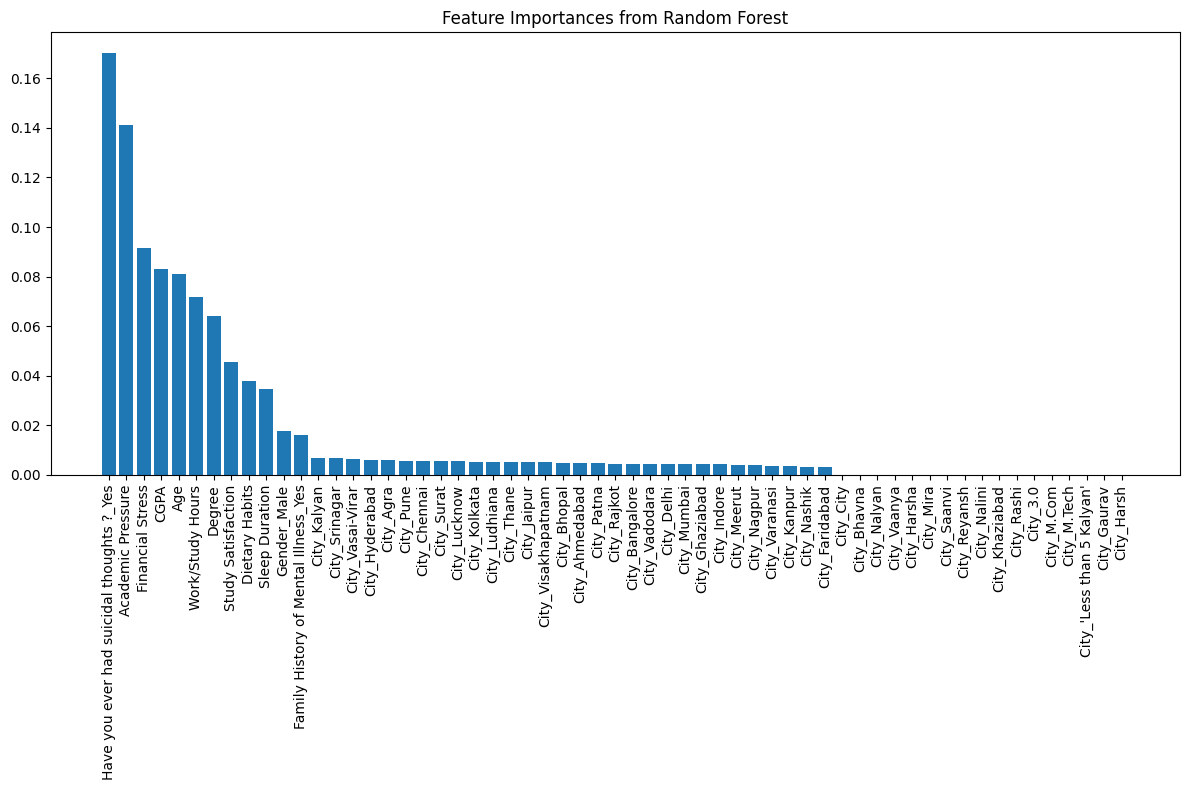

In [46]:
# viz

import matplotlib.pyplot as plt
import numpy as np

# Get feature names from preprocessor
def get_feature_names(preprocessor):
    # Ordinal features
    ordinal_features = preprocessor.named_transformers_['ord'].get_feature_names_out(ordinal_cols)
    # One-hot encoded features
    ohe_features = preprocessor.named_transformers_['ohe'].get_feature_names_out(nominal_cols)
    # Numerical features passed through
    numeric_features = numerical_cols
    # Combine all
    return np.concatenate([ordinal_features, ohe_features, numeric_features])

# Get final feature names
feature_names = get_feature_names(preprocessor)

# Get feature importances
importances = rf.feature_importances_

# Sort features by importance
indices = np.argsort(importances)[::-1]

# Plotting
plt.figure(figsize=(12, 8))
plt.title("Feature Importances from Random Forest")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# # grid search CV
# from sklearn.model_selection import GridSearchCV

# # defining parameters grid
# param_grid = {
#     "n_estimators" : [100, 500],
#     "criterion" : ["gini", "entropy", "log_loss"],
#     "max_features" : [None, "sqrt", "log2"]
# }

# grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=cv, scoring="accuracy", n_jobs=-1)
# grid_search.fit(xTrain, yTrain)

# print("Best Parameters (GridSearchCV):", grid_search.best_params_)
# print("Best Accuracy (GridSearchCV):", grid_search.best_score_)

# # Evaluating on best parameters
# best_svc_grid = grid_search.best_estimator_
# test_accuracy = best_lr_grid.score(xTest, yTest)
# print("Test Accuracy (GridSearchCV): ", test_accuracy)

## XGBoost

In [ ]:
!pip install xgboost

In [47]:
from xgboost import XGBClassifier

# Instantiate the model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Cross-validation on training data
xgb_scores = cross_val_score(xgb, xTrain, yTrain, cv=cv)
print("Model: XGBoost Classifier")
print("Cross Validation Scores:", xgb_scores)
print("Mean CV Accuracy:", xgb_scores.mean())

# Fit on full training data
xgb.fit(xTrain, yTrain)

# Evaluate on test data
xgb_test_accuracy = xgb.score(xTest, yTest)
print("Test Accuracy:", xgb_test_accuracy)

# Classification report and confusion matrix
y_pred_xgb = xgb.predict(xTest)
print("Classification Report:\n", classification_report(yTest, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(yTest, y_pred_xgb))

Model: XGBoost Classifier
Cross Validation Scores: [0.83808029 0.83112806 0.84503252 0.83064154 0.83692239]
Mean CV Accuracy: 0.8363609582386191
Test Accuracy: 0.8403301040545389
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80      2243
           1       0.86      0.88      0.87      3331

    accuracy                           0.84      5574
   macro avg       0.84      0.83      0.83      5574
weighted avg       0.84      0.84      0.84      5574

Confusion Matrix:
 [[1745  498]
 [ 392 2939]]


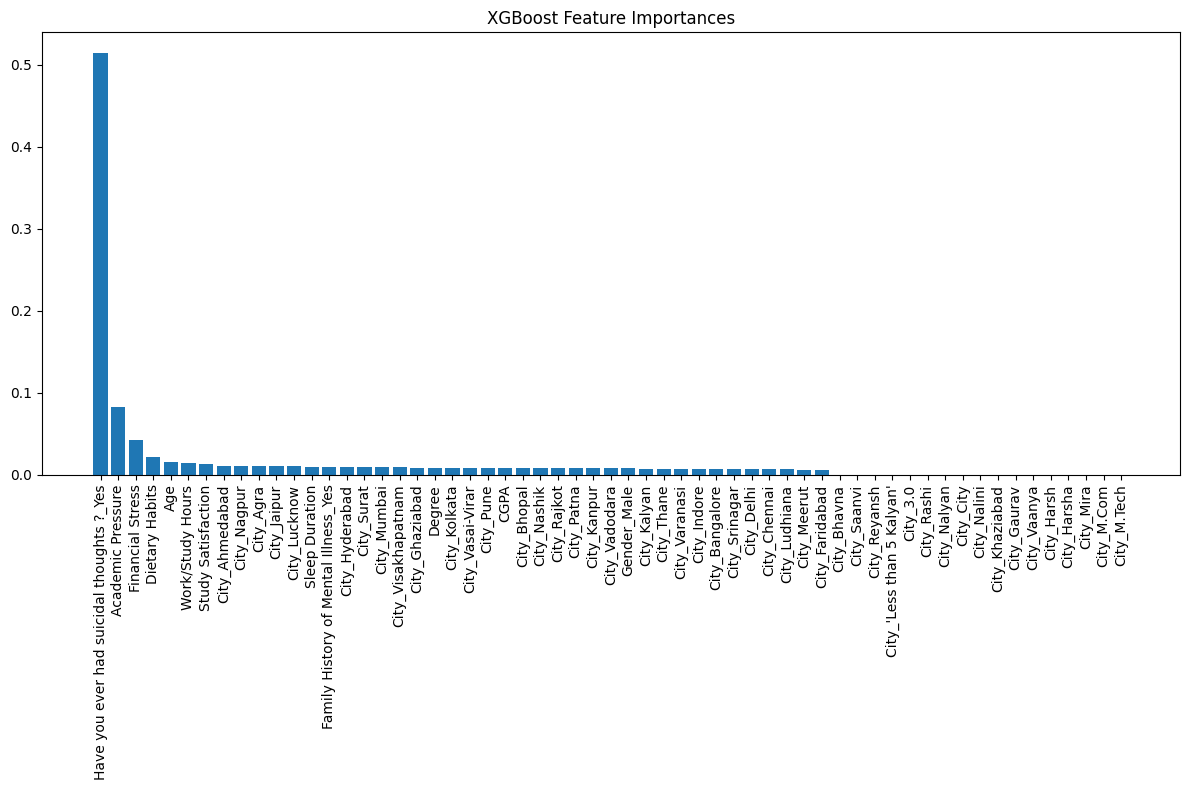

In [48]:
import matplotlib.pyplot as plt

# Plot feature importance
plt.figure(figsize=(12, 8))
xgb_importances = xgb.feature_importances_
sorted_idx = np.argsort(xgb_importances)[::-1]
plt.bar(range(len(xgb_importances)), xgb_importances[sorted_idx])
plt.xticks(range(len(xgb_importances)), feature_names[sorted_idx], rotation=90)
plt.title("XGBoost Feature Importances")
plt.tight_layout()
plt.show()

# Final Results

1. SVM Provides the best accuracy followed by Random Forest, XGBoost and Logistic Regression
2. Best Indicators - Suicidal Thoughts, Academic Pressure, Financial Stress and Dietary Habits